In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from scipy import signal
from scipy.fftpack import dct, idct, fft, ifft

import MEArec as mr
import MEAutility
import spikeinterface as si
import spikeinterface.toolkit as st
import spikeinterface.sorters as ss
import spikeinterface.extractors as se
import spikeinterface.comparison as sc
import spikeinterface.sorters as ssort
import spikeinterface.widgets as sw

It is highly recommended to configure Git before using DataLad. Set both 'user.name' and 'user.email' configuration variables.
It is highly recommended to configure Git before using DataLad. Set both 'user.name' and 'user.email' configuration variables.


In [2]:
def make_sparse(x,t):
    l = x.reshape(-1)
    p = np.argsort(np.abs(l))[-t]
    s = np.ma.masked_where(np.abs(x) < np.abs(l[p]), x)
    y = np.ma.filled(s.astype(float), 0.0)
    return y  

### Raw data

In [32]:
cell=[10, 20, 30]
d_raw = {}
for c in cell:
    print('start --------------------------------------------------', 'n_cell:' + str(c))
    d_config={}
    for k in range(10):
        print('-----start ---------------------------------------------', 'config:' + str(k))
        
        recording, gt = se.read_mearec('data/MEA10*10/recgen_cell_%s/%s.h5'%(c,k))
        sorting_IC = ss.run_ironclust(recording=recording, output_folder='tmp_IC0')
        comparison_gt = sc.compare_sorter_to_ground_truth(tested_sorting=sorting_IC, gt_sorting=gt, exhaustive_gt=True) 
        cmp_perf = comparison_gt.get_performance().astype('float32')
        cmp_perf.describe().loc[['mean', 'std']]
        
        we = si.extract_waveforms(recording, sorting_IC, folder='wf_quality_metrics', overwrite=True, n_jobs=5, chunk_size=recording.get_num_samples()//5, progress_bar=True)
        qm = st.compute_quality_metrics(we, metric_names=['snr'])
        
        d_config['config_'+str(k)] = {
        'avg_perf' : cmp_perf.describe().loc['mean'][['accuracy','recall', 'precision']].mean(),
        'std_perf' : cmp_perf.describe().loc['std'][['accuracy','recall', 'precision']].mean(),
        'avg_false_descovery_rate' : cmp_perf.describe().loc['mean']['false_discovery_rate'].mean(),
        'std_false_descovery_rate' : cmp_perf.describe().loc['std']['false_discovery_rate'].mean(),
        'avg_miss_rate' : cmp_perf.describe().loc['mean']['miss_rate'].mean(),
        'std_miss_rate' : cmp_perf.describe().loc['std']['miss_rate'].mean(),
        'n_well_detected_units': len(comparison_gt.get_well_detected_units()),
        'n_bad_units' : len(comparison_gt.get_bad_units()),
        'well_detected_units': comparison_gt.get_well_detected_units(),
        'snr_well_detected_units': qm['snr'][comparison_gt.get_well_detected_units()].values,
        'bad_units' : comparison_gt.get_bad_units(),
        'snr_bad_units': qm['snr'][comparison_gt.get_bad_units()].values
        }

    d_raw['n_cells_'+str(c)] = d_config

np.save('data/MEA10*10/raw_data_performance.npy', d_raw)

start -------------------------------------------------- n_cell:10
-----start --------------------------------------------- config:0
RUNNING SHELL SCRIPT: tmp_IC0/run_ironclust.sh


It is highly recommended to configure Git before using DataLad. Set both 'user.name' and 'user.email' configuration variables.
It is highly recommended to configure Git before using DataLad. Set both 'user.name' and 'user.email' configuration variables.
It is highly recommended to configure Git before using DataLad. Set both 'user.name' and 'user.email' configuration variables.
It is highly recommended to configure Git before using DataLad. Set both 'user.name' and 'user.email' configuration variables.
It is highly recommended to configure Git before using DataLad. Set both 'user.name' and 'user.email' configuration variables.
It is highly recommended to configure Git before using DataLad. Set both 'user.name' and 'user.email' configuration variables.
It is highly recommended to configure Git before using DataLad. Set both 'user.name' and 'user.email' configuration variables.
It is highly recommended to configure Git before using DataLad. Set both 'user.name' and 'user.email' configura

-----start --------------------------------------------- config:1
RUNNING SHELL SCRIPT: tmp_IC0/run_ironclust.sh


It is highly recommended to configure Git before using DataLad. Set both 'user.name' and 'user.email' configuration variables.
It is highly recommended to configure Git before using DataLad. Set both 'user.name' and 'user.email' configuration variables.
It is highly recommended to configure Git before using DataLad. Set both 'user.name' and 'user.email' configuration variables.
It is highly recommended to configure Git before using DataLad. Set both 'user.name' and 'user.email' configuration variables.
It is highly recommended to configure Git before using DataLad. Set both 'user.name' and 'user.email' configuration variables.
It is highly recommended to configure Git before using DataLad. Set both 'user.name' and 'user.email' configuration variables.
It is highly recommended to configure Git before using DataLad. Set both 'user.name' and 'user.email' configuration variables.
It is highly recommended to configure Git before using DataLad. Set both 'user.name' and 'user.email' configura

-----start --------------------------------------------- config:2
RUNNING SHELL SCRIPT: tmp_IC0/run_ironclust.sh


It is highly recommended to configure Git before using DataLad. Set both 'user.name' and 'user.email' configuration variables.
It is highly recommended to configure Git before using DataLad. Set both 'user.name' and 'user.email' configuration variables.
It is highly recommended to configure Git before using DataLad. Set both 'user.name' and 'user.email' configuration variables.
It is highly recommended to configure Git before using DataLad. Set both 'user.name' and 'user.email' configuration variables.
It is highly recommended to configure Git before using DataLad. Set both 'user.name' and 'user.email' configuration variables.
It is highly recommended to configure Git before using DataLad. Set both 'user.name' and 'user.email' configuration variables.
It is highly recommended to configure Git before using DataLad. Set both 'user.name' and 'user.email' configuration variables.
It is highly recommended to configure Git before using DataLad. Set both 'user.name' and 'user.email' configura

-----start --------------------------------------------- config:3
RUNNING SHELL SCRIPT: tmp_IC0/run_ironclust.sh


It is highly recommended to configure Git before using DataLad. Set both 'user.name' and 'user.email' configuration variables.
It is highly recommended to configure Git before using DataLad. Set both 'user.name' and 'user.email' configuration variables.
It is highly recommended to configure Git before using DataLad. Set both 'user.name' and 'user.email' configuration variables.
It is highly recommended to configure Git before using DataLad. Set both 'user.name' and 'user.email' configuration variables.
extract waveforms: 100%|██████████████████████████| 5/5 [00:03<00:00,  1.35it/s]


-----start --------------------------------------------- config:4
RUNNING SHELL SCRIPT: tmp_IC0/run_ironclust.sh


extract waveforms: 100%|██████████████████████████| 5/5 [00:02<00:00,  1.87it/s]


-----start --------------------------------------------- config:5
RUNNING SHELL SCRIPT: tmp_IC0/run_ironclust.sh


extract waveforms: 100%|██████████████████████████| 5/5 [00:02<00:00,  2.03it/s]


-----start --------------------------------------------- config:6
RUNNING SHELL SCRIPT: tmp_IC0/run_ironclust.sh


extract waveforms: 100%|██████████████████████████| 5/5 [00:03<00:00,  1.61it/s]


-----start --------------------------------------------- config:7
RUNNING SHELL SCRIPT: tmp_IC0/run_ironclust.sh


extract waveforms: 100%|██████████████████████████| 5/5 [00:03<00:00,  1.34it/s]


-----start --------------------------------------------- config:8
RUNNING SHELL SCRIPT: tmp_IC0/run_ironclust.sh


extract waveforms: 100%|██████████████████████████| 5/5 [00:03<00:00,  1.61it/s]


-----start --------------------------------------------- config:9
RUNNING SHELL SCRIPT: tmp_IC0/run_ironclust.sh


extract waveforms: 100%|██████████████████████████| 5/5 [00:03<00:00,  1.29it/s]


start -------------------------------------------------- n_cell:20
-----start --------------------------------------------- config:0
RUNNING SHELL SCRIPT: tmp_IC0/run_ironclust.sh


It is highly recommended to configure Git before using DataLad. Set both 'user.name' and 'user.email' configuration variables.
It is highly recommended to configure Git before using DataLad. Set both 'user.name' and 'user.email' configuration variables.
extract waveforms: 100%|██████████████████████████| 5/5 [00:07<00:00,  1.41s/it]


-----start --------------------------------------------- config:1
RUNNING SHELL SCRIPT: tmp_IC0/run_ironclust.sh


It is highly recommended to configure Git before using DataLad. Set both 'user.name' and 'user.email' configuration variables.
It is highly recommended to configure Git before using DataLad. Set both 'user.name' and 'user.email' configuration variables.
extract waveforms: 100%|██████████████████████████| 5/5 [00:06<00:00,  1.24s/it]


-----start --------------------------------------------- config:2
RUNNING SHELL SCRIPT: tmp_IC0/run_ironclust.sh


extract waveforms: 100%|██████████████████████████| 5/5 [00:06<00:00,  1.34s/it]


-----start --------------------------------------------- config:3
RUNNING SHELL SCRIPT: tmp_IC0/run_ironclust.sh


extract waveforms: 100%|██████████████████████████| 5/5 [00:06<00:00,  1.39s/it]


-----start --------------------------------------------- config:4
RUNNING SHELL SCRIPT: tmp_IC0/run_ironclust.sh


extract waveforms: 100%|██████████████████████████| 5/5 [00:07<00:00,  1.42s/it]


-----start --------------------------------------------- config:5
RUNNING SHELL SCRIPT: tmp_IC0/run_ironclust.sh


extract waveforms: 100%|██████████████████████████| 5/5 [00:05<00:00,  1.12s/it]


-----start --------------------------------------------- config:6
RUNNING SHELL SCRIPT: tmp_IC0/run_ironclust.sh


extract waveforms: 100%|██████████████████████████| 5/5 [00:06<00:00,  1.37s/it]


-----start --------------------------------------------- config:7
RUNNING SHELL SCRIPT: tmp_IC0/run_ironclust.sh


extract waveforms: 100%|██████████████████████████| 5/5 [00:05<00:00,  1.15s/it]


-----start --------------------------------------------- config:8
RUNNING SHELL SCRIPT: tmp_IC0/run_ironclust.sh


extract waveforms: 100%|██████████████████████████| 5/5 [00:07<00:00,  1.40s/it]


-----start --------------------------------------------- config:9
RUNNING SHELL SCRIPT: tmp_IC0/run_ironclust.sh


extract waveforms: 100%|██████████████████████████| 5/5 [00:05<00:00,  1.20s/it]


start -------------------------------------------------- n_cell:30
-----start --------------------------------------------- config:0
RUNNING SHELL SCRIPT: tmp_IC0/run_ironclust.sh


extract waveforms: 100%|██████████████████████████| 5/5 [00:08<00:00,  1.78s/it]


-----start --------------------------------------------- config:1
RUNNING SHELL SCRIPT: tmp_IC0/run_ironclust.sh


extract waveforms: 100%|██████████████████████████| 5/5 [00:09<00:00,  1.85s/it]


-----start --------------------------------------------- config:2
RUNNING SHELL SCRIPT: tmp_IC0/run_ironclust.sh


extract waveforms: 100%|██████████████████████████| 5/5 [00:10<00:00,  2.15s/it]


-----start --------------------------------------------- config:3
RUNNING SHELL SCRIPT: tmp_IC0/run_ironclust.sh


extract waveforms: 100%|██████████████████████████| 5/5 [00:09<00:00,  1.81s/it]


-----start --------------------------------------------- config:4
RUNNING SHELL SCRIPT: tmp_IC0/run_ironclust.sh


extract waveforms: 100%|██████████████████████████| 5/5 [00:08<00:00,  1.73s/it]


-----start --------------------------------------------- config:5
RUNNING SHELL SCRIPT: tmp_IC0/run_ironclust.sh


extract waveforms: 100%|██████████████████████████| 5/5 [00:10<00:00,  2.01s/it]


-----start --------------------------------------------- config:6
RUNNING SHELL SCRIPT: tmp_IC0/run_ironclust.sh


extract waveforms: 100%|██████████████████████████| 5/5 [00:10<00:00,  2.07s/it]


-----start --------------------------------------------- config:7
RUNNING SHELL SCRIPT: tmp_IC0/run_ironclust.sh


extract waveforms: 100%|██████████████████████████| 5/5 [00:08<00:00,  1.66s/it]


-----start --------------------------------------------- config:8
RUNNING SHELL SCRIPT: tmp_IC0/run_ironclust.sh


extract waveforms: 100%|██████████████████████████| 5/5 [00:08<00:00,  1.63s/it]


-----start --------------------------------------------- config:9
RUNNING SHELL SCRIPT: tmp_IC0/run_ironclust.sh


extract waveforms: 100%|██████████████████████████| 5/5 [00:07<00:00,  1.54s/it]


### Sparse Data

In [4]:
# run this cell 3 times for cells = [10,20,30] and window wl = [10k, .2k, .5k]

cell=30
wl = 500

d_config={}
for k in range(10):
    print('-----start ---------------------------------------------', 'config:' + str(k))
        
    recording, gt = se.read_mearec('data/MEA10*10/recgen_cell_%s/%s.h5'%(cell,k))
    sv = recording.get_traces().T
    ns = recording.get_num_samples()
    nch = recording.get_num_channels()
    fs = recording.get_sampling_frequency()
    nseg = recording.get_num_segments()
    probe = recording.get_probe()
 
    bc = signal.windows.blackmanharris(wl, sym=True)
    Zxx = signal.stft(sv, fs=fs, window=bc, nperseg=wl)[-1]

    Zxx_t = []
    for i in range(Zxx.shape[-1]): 
        vdct = dct(Zxx[:,:,i] , axis=0)
        vidct = idct(make_sparse(vdct.real, (wl*nch)//100//2)+1j*vdct.imag , axis=0)/nch/2
        Zxx_t.append(vidct)
    Zxx_t = np.swapaxes(Zxx_t,1,0)
    Zxx_t = np.swapaxes(Zxx_t,1,2)
    _, sv_t = signal.istft(Zxx_t, fs=fs, window=bc, nperseg=wl)

    recording_t = se.NumpyRecording(sv_t.T, sampling_frequency=fs)
    probe = recording.get_probe() # get the probe from orginal recording
    recording_t = recording_t.set_probe(probe)
    recording_t.annotate(is_filtered=True)

    sorting_IC_t = ss.run_ironclust(recording=recording_t, output_folder='tmp_IC')
    comparison_gt = sc.compare_sorter_to_ground_truth(tested_sorting=sorting_IC_t, gt_sorting=gt, exhaustive_gt=True) 
    cmp_perf = comparison_gt.get_performance().astype('float32')
    cmp_perf.describe().loc[['mean', 'std']]
        
    we = si.extract_waveforms(recording_t, sorting_IC_t, folder='wf_quality_metrics', overwrite=True, n_jobs=5, chunk_size=recording.get_num_samples()//5, progress_bar=True)
    qm = st.compute_quality_metrics(we, metric_names=['snr'])
        
    d_config['config_'+str(k)] = {
        'avg_perf' : cmp_perf.describe().loc['mean'][['accuracy','recall', 'precision']].mean(),
        'std_perf' : cmp_perf.describe().loc['std'][['accuracy','recall', 'precision']].mean(),
        'avg_false_descovery_rate' : cmp_perf.describe().loc['mean']['false_discovery_rate'].mean(),
        'std_false_descovery_rate' : cmp_perf.describe().loc['std']['false_discovery_rate'].mean(),
        'avg_miss_rate' : cmp_perf.describe().loc['mean']['miss_rate'].mean(),
        'std_miss_rate' : cmp_perf.describe().loc['std']['miss_rate'].mean(),
        'n_well_detected_units': len(comparison_gt.get_well_detected_units()),
        'n_bad_units' : len(comparison_gt.get_bad_units()),
        'well_detected_units': comparison_gt.get_well_detected_units(),
        'bad_units' : comparison_gt.get_bad_units(),
        'snr_well_detected_units': qm['snr'][comparison_gt.get_well_detected_units()],
        'snr_bad_units': qm['snr'][comparison_gt.get_bad_units()]
        }
    
np.save('data/MEA10*10/sssparse-performance_%s.npy'%cell, d_config)

### Let's compare the data

In [5]:
data_raw = np.load('data/MEA10*10/raw_data_performance.npy',allow_pickle='TRUE')
data_sparse_10 = np.load('data/MEA10*10/sparse-performance_10.npy',allow_pickle='TRUE')
data_sparse_20 = np.load('data/MEA10*10/sparse-performance_20.npy',allow_pickle='TRUE')
data_sparse_30 = np.load('data/MEA10*10/sparse-performance_30.npy',allow_pickle='TRUE')

In [6]:
df_raw_10 = pd.DataFrame(data_raw.item()['n_cells_10'])
df_raw_20 = pd.DataFrame(data_raw.item()['n_cells_20'])
df_raw_30 = pd.DataFrame(data_raw.item()['n_cells_30'])
df_sparse_10 = pd.DataFrame(data_sparse_10.item())
df_sparse_20 = pd.DataFrame(data_sparse_20.item())
df_sparse_30 = pd.DataFrame(data_sparse_30.item())

In [7]:
df_raw_10

,config_0,config_1,config_2,config_3,config_4,config_5,config_6,config_7,config_8,config_9
avg_perf,0.939531,0.785667,0.978412,0.812758,0.973451,0.878478,0.859458,0.955636,0.98558,0.953667
std_perf,0.109645,0.416126,0.052786,0.327347,0.0455,0.313143,0.319746,0.091363,0.026394,0.091361
avg_false_descovery_rate,0.078048,0.016419,0.022119,0.12481,0.012044,0.021762,0.053652,0.014546,0.007831,0.049292
std_false_descovery_rate,0.159664,0.050479,0.069513,0.200996,0.035044,0.064636,0.130775,0.044669,0.019182,0.111161
avg_miss_rate,0.0127,0.005219,0.010302,0.006566,0.028929,0.010692,0.007322,0.052006,0.014223,0.022266
std_miss_rate,0.01552,0.007746,0.019704,0.00883,0.038717,0.013876,0.008065,0.113994,0.022158,0.040705
n_well_detected_units,8,8,9,6,10,8,8,9,10,8
n_bad_units,1,1,5,5,3,3,2,4,6,4
well_detected_units,"[1, 2, 4, 5, 6, 7, 9, 10]","[1, 2, 3, 4, 5, 6, 7, 8]","[1, 2, 4, 5, 7, 8, 10, 13, 14]","[1, 2, 3, 5, 6, 8]","[1, 2, 5, 6, 7, 8, 9, 10, 11, 12]","[2, 3, 5, 6, 7, 8, 9, 11]","[2, 3, 4, 5, 6, 7, 8, 9]","[1, 2, 3, 6, 7, 9, 11, 12, 13]","[1, 2, 4, 5, 7, 8, 10, 11, 14, 15]","[1, 3, 5, 6, 8, 9, 11, 13]"
snr_well_detected_units,"[18.271671, 20.908154, 52.749645, 20.882334, 1...","[18.02712, 11.773228, 31.37179, 24.804499, 17....","[13.366861, 32.125076, 42.790035, 11.668021, 2...","[12.293102, 12.924216, 15.460599, 32.167927, 1...","[28.108818, 21.950691, 25.986084, 23.314728, 4...","[12.4634695, 25.81307, 18.109596, 11.745758, 1...","[37.84939, 29.19435, 12.941067, 19.739405, 23....","[21.094679, 13.854959, 23.687252, 22.56056, 21...","[13.723207, 33.271904, 43.40043, 11.803074, 29...","[12.643194, 16.558126, 21.455353, 20.229628, 1..."


In [8]:
df_sparse_10

,config_0,config_1,config_2,config_3,config_4,config_5,config_6,config_7,config_8,config_9
avg_perf,0.971438,0.885046,0.992714,0.95706,0.966916,0.888741,0.859019,0.88041,0.992477,0.981686
std_perf,0.065163,0.312028,0.011581,0.072759,0.040854,0.312578,0.317379,0.310422,0.011078,0.025866
avg_false_descovery_rate,0.033167,0.01286,0.001411,0.047552,0.02586,0.002859,0.05113,0.01143,0.001056,0.008204
std_false_descovery_rate,0.094717,0.029638,0.003655,0.102157,0.039963,0.008386,0.122942,0.031619,0.00334,0.019978
avg_miss_rate,0.009728,0.009709,0.009541,0.017321,0.024565,0.014123,0.010397,0.018001,0.010253,0.01964
std_miss_rate,0.00885,0.012091,0.015015,0.01786,0.030159,0.01384,0.013861,0.016153,0.014253,0.022086
n_well_detected_units,9,9,10,9,10,9,8,9,10,10
n_bad_units,12,3,9,8,7,5,4,7,9,7
well_detected_units,"[1, 3, 4, 6, 9, 10, 11, 12, 21]","[1, 3, 4, 5, 6, 7, 9, 10, 11]","[1, 2, 5, 7, 8, 9, 11, 12, 17, 18]","[1, 2, 3, 4, 5, 6, 9, 11, 12]","[3, 4, 7, 8, 9, 11, 12, 13, 14, 16]","[1, 4, 6, 7, 8, 9, 10, 11, 12]","[2, 4, 5, 6, 7, 8, 9, 10]","[1, 2, 4, 9, 10, 11, 13, 14, 15]","[1, 2, 5, 7, 8, 9, 12, 13, 15, 18]","[1, 3, 4, 5, 6, 7, 10, 13, 14, 16]"
bad_units,"[0, 2, 5, 7, 8, 13, 14, 15, 17, 18, 19, 20]","[0, 2, 8]","[0, 3, 4, 6, 10, 13, 14, 15, 16]","[0, 7, 8, 10, 14, 15, 16, 17]","[0, 1, 2, 5, 6, 10, 15]","[0, 2, 3, 5, 13]","[0, 1, 3, 12]","[0, 3, 5, 6, 7, 8, 12]","[0, 3, 4, 6, 10, 11, 14, 16, 17]","[0, 2, 8, 9, 11, 12, 15]"


In [9]:
df_raw_20

,config_0,config_1,config_2,config_3,config_4,config_5,config_6,config_7,config_8,config_9
avg_perf,0.939838,0.913777,0.985142,0.96978,0.936343,0.969906,0.962947,0.917144,0.976473,0.975949
std_perf,0.088016,0.222772,0.019627,0.046346,0.22069,0.033195,0.064299,0.112064,0.023814,0.028257
avg_false_descovery_rate,0.062053,0.023554,0.000472,0.017468,0.002301,0.00928,0.025292,0.093802,0.006846,0.010961
std_false_descovery_rate,0.121257,0.065941,0.001104,0.058438,0.003269,0.018145,0.07493,0.153575,0.009858,0.025329
avg_miss_rate,0.029929,0.031254,0.021824,0.028178,0.018239,0.036241,0.031509,0.032307,0.028653,0.025374
std_miss_rate,0.025059,0.034485,0.028889,0.022025,0.01391,0.038691,0.034779,0.035444,0.029888,0.025018
n_well_detected_units,16,18,20,19,19,20,19,15,20,20
n_bad_units,3,7,6,8,8,5,8,7,7,6
well_detected_units,"[1, 2, 3, 5, 6, 8, 9, 10, 13, 14, 16, 17, 18, ...","[2, 3, 4, 6, 8, 10, 11, 12, 13, 14, 15, 16, 17...","[1, 2, 3, 4, 6, 7, 8, 10, 11, 13, 15, 16, 17, ...","[1, 2, 3, 4, 6, 7, 8, 9, 11, 14, 15, 16, 18, 1...","[1, 2, 3, 4, 5, 6, 9, 10, 12, 13, 14, 15, 16, ...","[2, 3, 5, 6, 7, 8, 9, 10, 11, 12, 13, 15, 16, ...","[1, 2, 3, 4, 5, 6, 8, 12, 13, 14, 15, 16, 19, ...","[1, 2, 4, 5, 7, 8, 10, 12, 13, 14, 15, 17, 22,...","[1, 2, 4, 5, 6, 7, 8, 9, 13, 14, 15, 16, 17, 1...","[1, 2, 3, 4, 6, 7, 8, 10, 11, 12, 13, 14, 15, ..."
snr_well_detected_units,"[10.468562, 18.311531, 16.519821, 10.882647, 1...","[19.30608, 33.97181, 19.699545, 15.293516, 10....","[35.311745, 21.981977, 35.87471, 13.512911, 10...","[15.925235, 19.558962, 11.9354315, 19.432455, ...","[19.961294, 16.384344, 17.186207, 26.584593, 2...","[19.029596, 12.5583, 10.566385, 28.041845, 40....","[13.165174, 11.753486, 21.045992, 26.487059, 1...","[11.073613, 49.42742, 14.050035, 34.425137, 10...","[22.758259, 10.349845, 17.966068, 26.16758, 12...","[10.903587, 21.702864, 25.092276, 25.513163, 3..."


In [10]:
df_sparse_20

,config_0,config_1,config_2,config_3,config_4,config_5,config_6,config_7,config_8,config_9
avg_perf,0.914242,0.895878,0.962423,0.945483,0.956114,0.952388,0.939876,0.944134,0.968501,0.909191
std_perf,0.220275,0.223612,0.065725,0.078324,0.057041,0.056205,0.08152,0.074478,0.027826,0.225569
avg_false_descovery_rate,0.022762,0.036583,0.025371,0.047906,0.035691,0.022703,0.047737,0.047569,0.012871,0.026796
std_false_descovery_rate,0.052398,0.078978,0.082856,0.104505,0.075046,0.055668,0.095311,0.091338,0.014863,0.076725
avg_miss_rate,0.031783,0.047361,0.031888,0.035811,0.030688,0.049599,0.044975,0.03782,0.034843,0.036844
std_miss_rate,0.0263,0.043804,0.028922,0.025067,0.024905,0.04582,0.04668,0.038093,0.032691,0.039435
n_well_detected_units,18,16,19,17,18,19,18,17,20,18
n_bad_units,5,6,4,7,11,10,10,7,8,6
well_detected_units,"[1, 2, 3, 6, 7, 8, 9, 11, 12, 13, 14, 15, 16, ...","[2, 3, 4, 6, 8, 10, 11, 13, 15, 16, 17, 18, 19...","[2, 3, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, ...","[1, 2, 5, 7, 8, 9, 11, 12, 14, 15, 16, 18, 19,...","[2, 3, 4, 6, 7, 8, 12, 13, 14, 15, 17, 18, 19,...","[1, 3, 5, 6, 8, 9, 10, 11, 12, 13, 14, 18, 19,...","[1, 2, 3, 4, 5, 6, 10, 11, 13, 14, 15, 16, 18,...","[3, 4, 5, 6, 8, 9, 11, 12, 13, 14, 16, 17, 18,...","[1, 2, 4, 6, 7, 8, 9, 10, 14, 15, 16, 17, 18, ...","[1, 2, 4, 5, 6, 7, 8, 10, 11, 13, 15, 16, 17, ..."
bad_units,"[0, 5, 10, 18, 21]","[0, 1, 5, 12, 14, 23]","[0, 1, 19, 21]","[0, 3, 6, 10, 17, 20, 25]","[0, 1, 5, 9, 10, 11, 16, 21, 25, 28, 29]","[0, 2, 4, 7, 15, 16, 17, 23, 25, 29]","[0, 7, 8, 9, 12, 17, 24, 26, 28, 29]","[0, 1, 7, 10, 15, 21, 24]","[0, 3, 5, 11, 12, 13, 21, 25]","[0, 3, 9, 14, 18, 24]"


In [11]:
df_raw_30

,config_0,config_1,config_2,config_3,config_4,config_5,config_6,config_7,config_8,config_9
avg_perf,0.966656,0.956542,0.933841,0.951745,0.857171,0.949968,0.939514,0.925944,0.942143,0.91034
std_perf,0.027041,0.073182,0.100909,0.07521,0.302971,0.075624,0.179385,0.198359,0.072937,0.248004
avg_false_descovery_rate,0.00567,0.030553,0.067072,0.021989,0.039299,0.031215,0.009713,0.033959,0.032611,0.004622
std_false_descovery_rate,0.010003,0.097987,0.142201,0.063097,0.104081,0.094807,0.020835,0.115984,0.084499,0.007307
avg_miss_rate,0.044731,0.034902,0.032946,0.051039,0.025927,0.044354,0.031409,0.027683,0.055897,0.030012
std_miss_rate,0.033411,0.028236,0.027547,0.072315,0.028659,0.039198,0.024195,0.025792,0.043993,0.02061
n_well_detected_units,30,28,25,28,24,28,29,27,28,28
n_bad_units,9,8,9,8,5,11,9,3,5,9
well_detected_units,"[1, 2, 4, 5, 7, 8, 9, 10, 11, 12, 13, 15, 16, ...","[1, 3, 4, 7, 8, 9, 10, 12, 13, 14, 15, 16, 17,...","[1, 2, 3, 4, 6, 7, 9, 10, 12, 14, 15, 16, 18, ...","[1, 2, 4, 5, 6, 7, 8, 9, 10, 12, 13, 14, 15, 1...","[1, 2, 3, 4, 7, 8, 9, 10, 11, 12, 13, 14, 15, ...","[2, 3, 4, 6, 7, 8, 9, 10, 12, 14, 15, 16, 17, ...","[1, 2, 3, 4, 5, 6, 7, 8, 11, 13, 14, 15, 16, 1...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 13, 14, 16...","[1, 2, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, ...","[1, 2, 4, 5, 7, 8, 9, 10, 11, 15, 16, 18, 19, ..."
snr_well_detected_units,"[9.733274, 30.535946, 9.6473255, 31.90738, 10....","[30.236738, 41.038734, 13.806038, 10.909743, 1...","[11.784402, 13.806107, 10.458845, 15.05572, 23...","[11.846542, 15.04011, 16.99744, 28.974016, 15....","[36.485245, 12.572643, 19.495214, 13.135155, 3...","[11.8022585, 14.6668415, 9.824531, 10.874541, ...","[37.076992, 17.659407, 18.43254, 11.466194, 11...","[19.204905, 12.716867, 8.849428, 14.067331, 24...","[9.850415, 11.270035, 16.850817, 10.090566, 12...","[21.62367, 10.156588, 31.856152, 17.255547, 24..."


In [12]:
df_sparse_30

,config_0,config_1,config_2,config_3,config_4,config_5,config_6,config_7,config_8,config_9
avg_perf,0.953405,0.953603,0.943215,0.944449,0.884975,0.941353,0.965239,0.961668,0.933104,0.925754
std_perf,0.038796,0.050117,0.069578,0.070281,0.252663,0.064105,0.029308,0.047658,0.07384,0.177935
avg_false_descovery_rate,0.012054,0.02186,0.043404,0.02061,0.034085,0.019703,0.00948,0.017631,0.034379,0.013658
std_false_descovery_rate,0.018504,0.04829,0.087138,0.028522,0.089897,0.029508,0.010503,0.052372,0.069953,0.01982
avg_miss_rate,0.05893,0.04884,0.043171,0.064178,0.040086,0.070333,0.043202,0.040443,0.068012,0.048497
std_miss_rate,0.044311,0.040298,0.035929,0.08896,0.037207,0.076015,0.036627,0.032225,0.063253,0.035356
n_well_detected_units,30,29,26,28,25,26,30,29,27,29
n_bad_units,15,18,16,11,12,15,18,10,9,17
well_detected_units,"[1, 2, 3, 6, 8, 9, 10, 12, 13, 14, 15, 17, 18,...","[1, 5, 6, 8, 10, 11, 12, 15, 16, 19, 20, 21, 2...","[1, 2, 3, 4, 7, 8, 10, 11, 13, 16, 19, 22, 23,...","[1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 14, 1...","[2, 5, 6, 7, 9, 10, 11, 12, 13, 14, 15, 16, 17...","[2, 4, 5, 8, 9, 10, 11, 17, 18, 19, 20, 21, 24...","[1, 4, 5, 6, 7, 9, 10, 12, 15, 18, 19, 20, 21,...","[1, 2, 3, 4, 6, 7, 8, 9, 10, 11, 12, 14, 16, 1...","[1, 2, 3, 5, 6, 7, 8, 10, 12, 13, 14, 16, 17, ...","[2, 3, 4, 7, 9, 10, 11, 12, 13, 14, 18, 19, 21..."
bad_units,"[0, 4, 5, 7, 11, 16, 22, 23, 25, 26, 29, 33, 3...","[0, 2, 3, 4, 9, 13, 14, 17, 18, 26, 33, 34, 35...","[0, 6, 9, 12, 14, 15, 18, 20, 21, 26, 30, 35, ...","[0, 9, 16, 21, 22, 23, 28, 33, 34, 35, 37]","[0, 1, 3, 4, 8, 19, 23, 26, 28, 29, 33, 38]","[0, 1, 6, 7, 12, 13, 15, 16, 22, 23, 28, 35, 4...","[0, 2, 3, 8, 11, 13, 14, 16, 17, 33, 34, 35, 3...","[0, 5, 13, 15, 18, 22, 24, 28, 34, 39]","[0, 4, 9, 11, 21, 31, 32, 34, 35]","[0, 1, 5, 6, 8, 15, 16, 17, 20, 24, 26, 27, 29..."


In [ ]:
# def stft_space_time(v,wl):
#     bc = signal.windows.blackmanharris(wl, sym=True)
#     yield signal.stft(v, fs=fs, window=bc, nperseg=wl)[-1]
    
# def istft_space_time(v,wl):
#     bc = signal.windows.blackmanharris(wl, sym=True)
#     yield signal.istft(v, fs=fs, window=bc, nperseg=wl)[-1]

In [3]:
cell = 30
k = 0
wl = 200
recording, gt = se.read_mearec('data/MEA10*10/recgen_cell_%s/%s.h5'%(cell,k))
sv = recording.get_traces().T
ns = recording.get_num_samples()
nch = recording.get_num_channels()
fs = recording.get_sampling_frequency()
nseg = recording.get_num_segments()
probe = recording.get_probe()
 
bc = signal.windows.blackmanharris(wl, sym=True)
Zxx = signal.stft(sv, fs=fs, window=bc, nperseg=wl)[-1]

Zxx_t = []
for i in range(Zxx.shape[-1]): 
    vdct = dct(Zxx[:,:,i] , axis=0)
    vidct = idct(make_sparse(vdct.real, (wl*nch)//100//2)+1j*vdct.imag , axis=0)/nch/2
    Zxx_t.append(vidct)
Zxx_t = np.swapaxes(Zxx_t,1,0)
Zxx_t = np.swapaxes(Zxx_t,1,2)
_, sv_t = signal.istft(Zxx_t, fs=fs, window=bc, nperseg=wl)

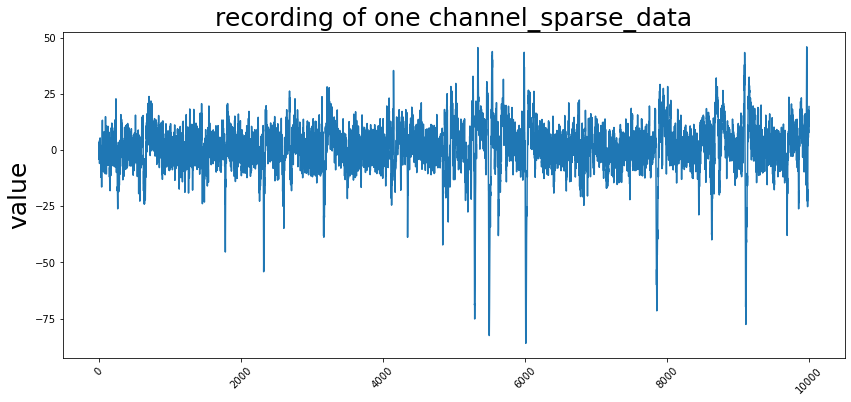

In [4]:
plt.figure(figsize=(14,6))
plt.xticks(rotation=45)
plt.rc('xtick', labelsize=25) 
plt.rc('ytick', labelsize=25)
plt.ylabel('value', fontsize=25)
plt.title('recording of one channel_sparse_data', fontsize=25)
plt.plot(sv_t[0,:10000])

In [16]:
wl = 1000
recording, gt = se.read_mearec('data/MEA10*10/recgen_cell_%s/%s.h5'%(10,0))
sv = recording.get_traces().T
ns = recording.get_num_samples()
nch = recording.get_num_channels()
fs = recording.get_sampling_frequency()
nseg = recording.get_num_segments()
probe = recording.get_probe()
bc = signal.windows.blackmanharris(wl, sym=True)
Zxx = signal.stft(sv, fs=fs, window=bc, nperseg=wl)[-1]
vdct = dct(Zxx[:,:,0] , axis=0)
vdct_sparse = make_sparse(vdct.real, (wl*nch)//100//2)

In [21]:
wl = 100
bc = signal.windows.blackmanharris(wl, sym=True)
Zxx = signal.stft(vdct, fs=fs, window=bc, nperseg=wl)[-1]
vdct1 = dct(Zxx[:,:,0] , axis=0)
vdct1_sparse = make_sparse(vdct_sparse.real, (wl*nch)//100//2)

In [25]:
vdct1.shape

(100, 100)